# Import Library
Pada tahap ini, dilakukan import library yang dibutuhkan untuk menjalankan proses machine learning. Library seperti `pandas`, `numpy`, `matplotlib`, dan `seaborn` digunakan untuk data handling dan visualisasi. Library `sklearn` digunakan untuk preprocessing, pembuatan model, dan evaluasi.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
. Dataset dimuat dari file CSV berisi 1000 data kuantitatif terkait pertanian dan peternakan. Data ini mencakup fitur-fitur seperti luas lahan, produksi, jumlah ternak, hingga umur panen. Dataset digunakan untuk membangun model klasifikasi jenis komoditas.

In [ ]:
df = pd.read_csv('Pertanian_Peternakan.csv')

# Exploratory Data Analysis (EDA)
Tahapan ini bertujuan memahami struktur data, tipe data, dan melihat distribusi nilai dari setiap fitur. Visualisasi seperti histogram dan heatmap korelasi digunakan untuk menemukan pola, outlier, dan hubungan antar variabel.
Insight awal: Beberapa fitur seperti "Produksi" dan "Jumlah Ternak" memiliki range nilai besar, dan terdapat korelasi positif antara berat rata-rata ternak dan jumlah ternak.

In [ ]:
df.head(15)

,ID,Jenis Komoditas,Luas Lahan (ha),Produksi (ton),Jumlah Ternak (ekor),Berat Rata-rata Ternak (kg),Umur Panen (hari),Label
0,1,Sapi,0.00,0.00,769,391.30,0,6
1,2,Kedelai,0.96,5.24,0,0.00,114,4
2,3,Jagung,0.64,1.84,0,0.00,94,2
3,4,Sapi,0.00,0.00,584,379.80,0,6
4,5,Ayam Petelur,0.00,0.00,235,1.95,150,1
5,6,Padi,3.91,12.27,0,0.00,107,5
6,7,Padi,1.47,8.16,0,0.00,86,5
7,8,Padi,2.12,8.22,0,0.00,96,5
8,9,Ayam Petelur,0.00,0.00,559,1.62,150,1
9,10,Sapi,0.00,0.00,575,394.00,0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1000 non-null   int64  
 1   Jenis Komoditas              1000 non-null   object 
 2   Luas Lahan (ha)              1000 non-null   float64
 3   Produksi (ton)               1000 non-null   float64
 4   Jumlah Ternak (ekor)         1000 non-null   int64  
 5   Berat Rata-rata Ternak (kg)  1000 non-null   float64
 6   Umur Panen (hari)            1000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ID,0
Jenis Komoditas,0
Luas Lahan (ha),0
Produksi (ton),0
Jumlah Ternak (ekor),0
Berat Rata-rata Ternak (kg),0
Umur Panen (hari),0


In [ ]:
print(df["Jenis Komoditas"].value_counts())

Jenis Komoditas
Kedelai          171
Padi             166
Jagung           158
Ayam Petelur     136
Kambing          131
Sapi             119
Ayam Pedaging    119
Name: count, dtype: int64


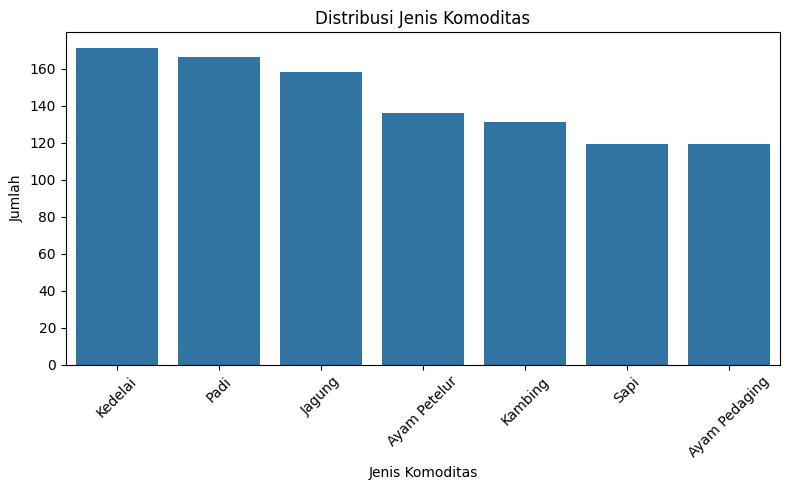

In [ ]:
# Distribusi target (Jenis Komoditas)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Jenis Komoditas', order=df['Jenis Komoditas'].value_counts().index)
plt.title('Distribusi Jenis Komoditas')
plt.xlabel('Jenis Komoditas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Preparation
Fitur target `Jenis Komoditas` diubah ke bentuk numerik menggunakan LabelEncoder. Fitur numerik dinormalisasi menggunakan StandardScaler untuk menyamakan skala data.
Dataset dibagi menjadi data latih dan data uji (80:20) dengan stratifikasi untuk menjaga distribusi kelas target tetap seimbang.


In [ ]:
# Label encoder
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Jenis Komoditas"])
X = df[["Luas Lahan (ha)", "Produksi (ton)", "Jumlah Ternak (ekor)",
        "Berat Rata-rata Ternak (kg)", "Umur Panen (hari)"]]
y = df["Label"]

In [ ]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
num_classes = len(label_encoder.classes_)
num_classes

7

# Modeling: Decision Tree
Model Decision Tree digunakan sebagai baseline model. Parameter seperti `criterion='entropy'` dan `max_depth=10` digunakan untuk menghindari overfitting.
Model dilatih menggunakan data training dan kemudian diuji pada data testing.


In [ ]:
# 7. Decision Tree Modeling
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

# Evaluasi Model
Model diuji menggunakan metrik akurasi. Hasil akurasi dari model Decision Tree pada data uji adalah sebesar 67%.
Meskipun hasilnya belum ideal (target ≥ 85%), model memberikan dasar untuk iterasi model berikutnya. Selanjutnya, akan dilakukan pengujian model lain seperti Random Forest dan tuning hyperparameter untuk peningkatan performa.


In [ ]:
#  Evaluation
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Akurasi: 0.67
Classification Report:
                precision    recall  f1-score   support

Ayam Pedaging       1.00      1.00      1.00        24
 Ayam Petelur       1.00      1.00      1.00        27
       Jagung       0.35      0.22      0.27        32
      Kambing       1.00      1.00      1.00        26
      Kedelai       0.35      0.41      0.38        34
         Padi       0.28      0.33      0.31        33
         Sapi       1.00      1.00      1.00        24

     accuracy                           0.67       200
    macro avg       0.71      0.71      0.71       200
 weighted avg       0.67      0.67      0.66       200



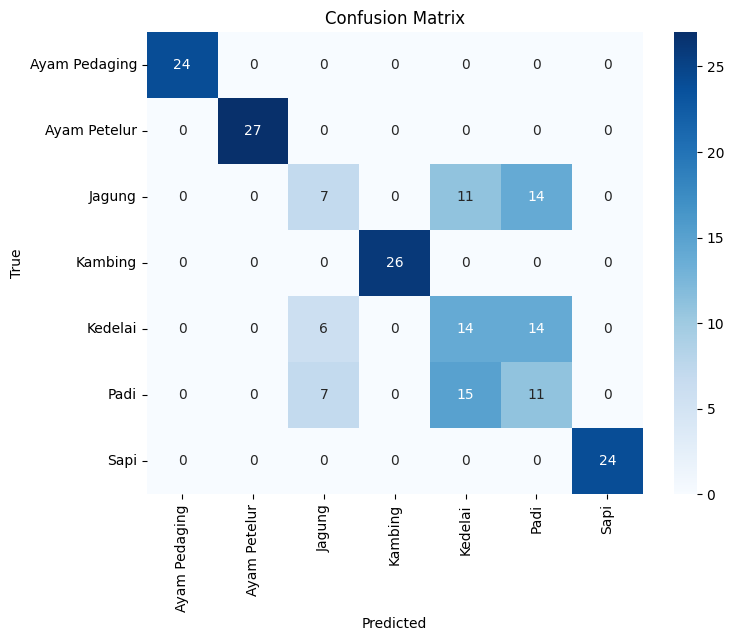

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


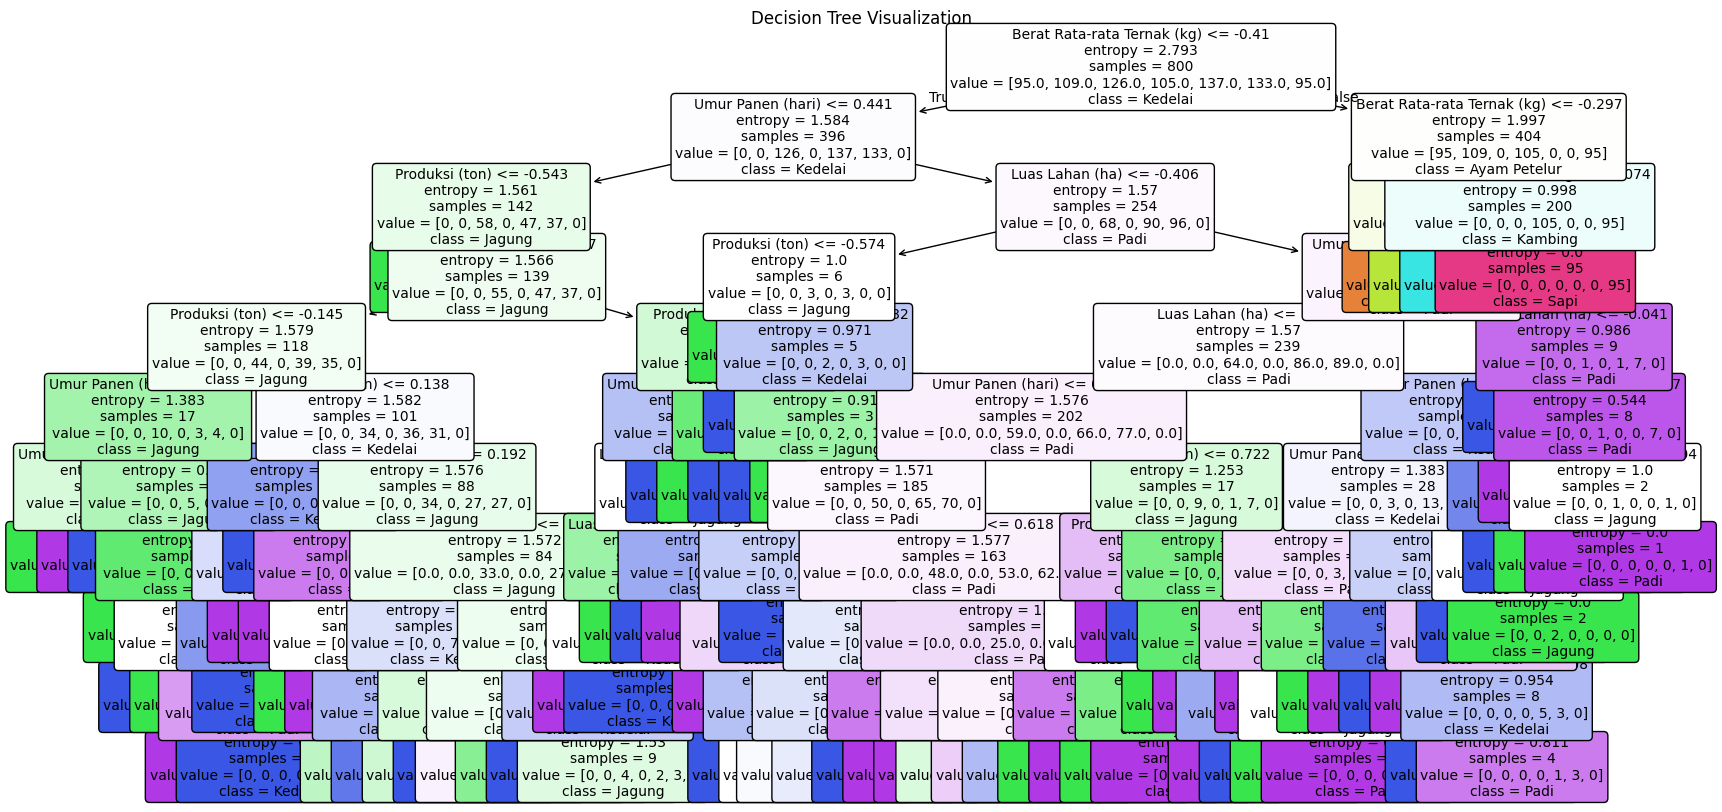

In [ ]:
# Visualisasi Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Kesimpulan
Proyek ini membangun model klasifikasi komoditas berbasis fitur kuantitatif pertanian dan peternakan. Model Decision Tree memberikan hasil akurasi sebesar 67%.
Next step: Eksperimen dengan model lain (Random Forest, KNN), serta menambahkan fitur eksternal seperti lokasi, musim, atau harga pasar untuk meningkatkan akurasi.
